## K Nearest Neighbour
KNN is a supervised algorithms which can be used for both classification and regresison. However, it is more widely used in classification problems in the industry. K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases by a majority vote of its k neighbors. The unknown case is assigned to the class whose points are more, near the unknown case. For example if you have two classes, Dog, and Cat and you passed an image of a unkown pet then it will first find the class with higest number of points near it, if there is 5 points of dog class and 3 points of cats near it then it will be assigned to dog class. 

These nearest neigbour are founded by the distance formula such as `Euclidean`, `Manhattan`, `Minkowski` and `Hamming` distance. First three functions are used for continuous function and fourth one (Hamming) for categorical variables.

### How Does it work?
**Step 1** → First we choose the data point we want to classify, let’s name it `M` for a while.

**Step 2** →  After that we decide the value of `K` which is the number of nearest neighbours to a point we want to classify which in our case is `M`. The value of K is decided by the practitioner, depending on the data and domain. 

Also it is believed to be good practise to keep the value of `K` as an odd number because we classify any value to a class based on the maximum number of nearest data points of certain class to the point we want to classify and if we choose the value of `K` as an even number then the result could be a tie.

**Step 3** → After deciding the value of `K`, (which is K nearest data points of available class to the data points we are classifying `M`) then we create an imaginary circle covering those `K` values around the point `M`. And now we will count whose class’s data points are maximum inside the circle. The data point will be assigned to the class which has the maximum data point inside that circle.

> 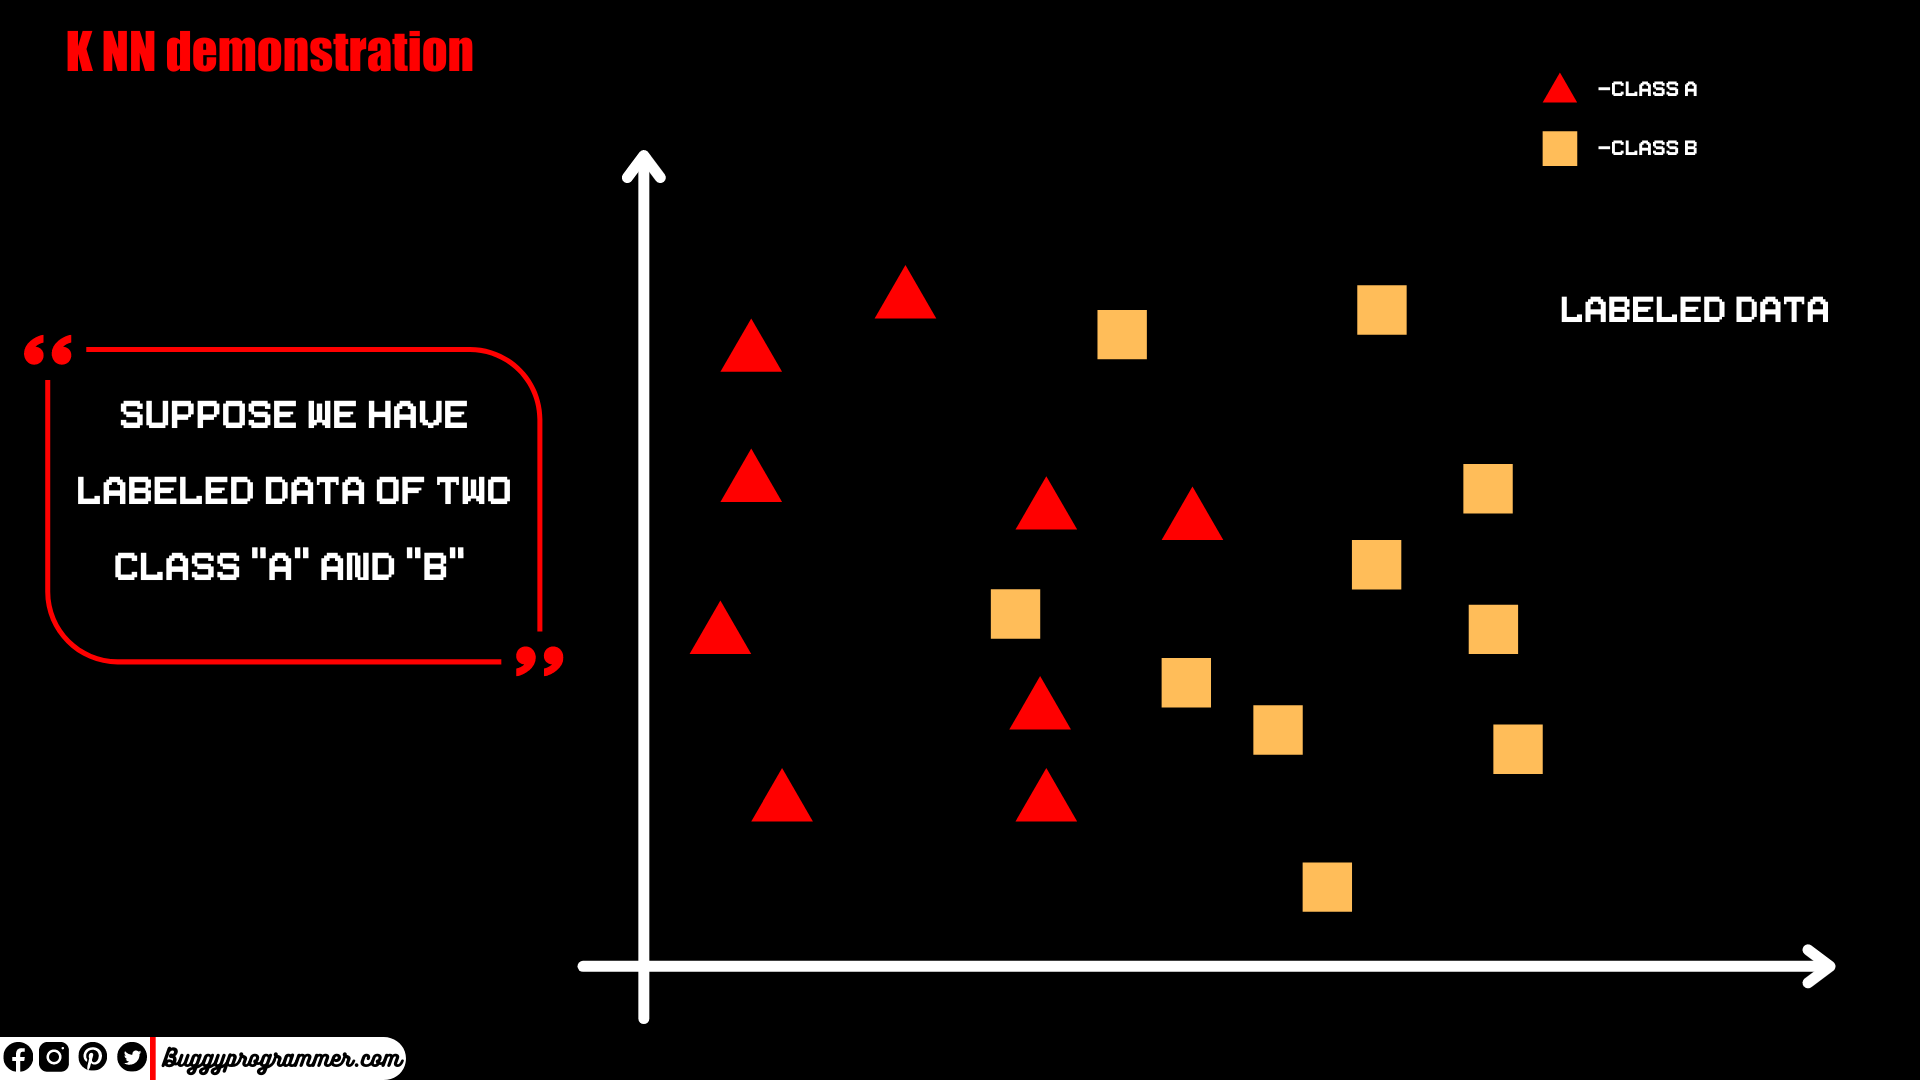
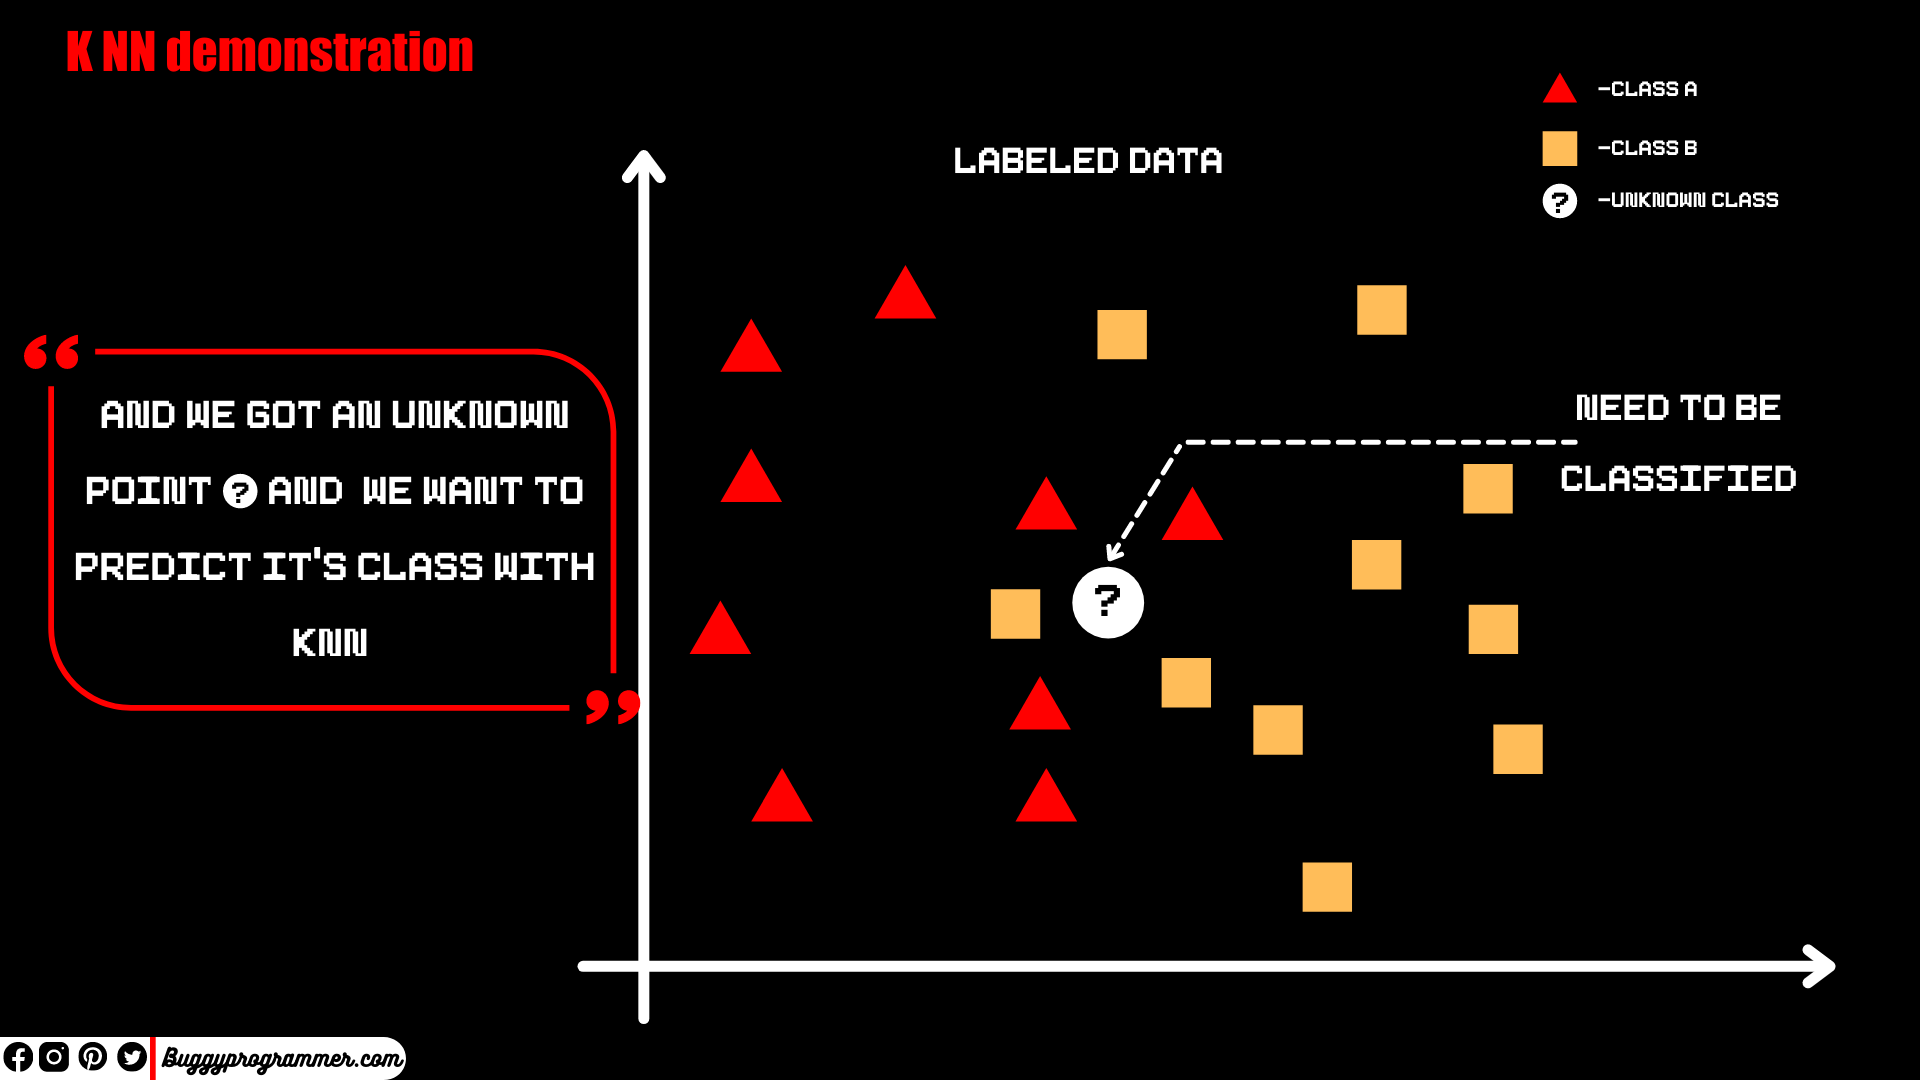
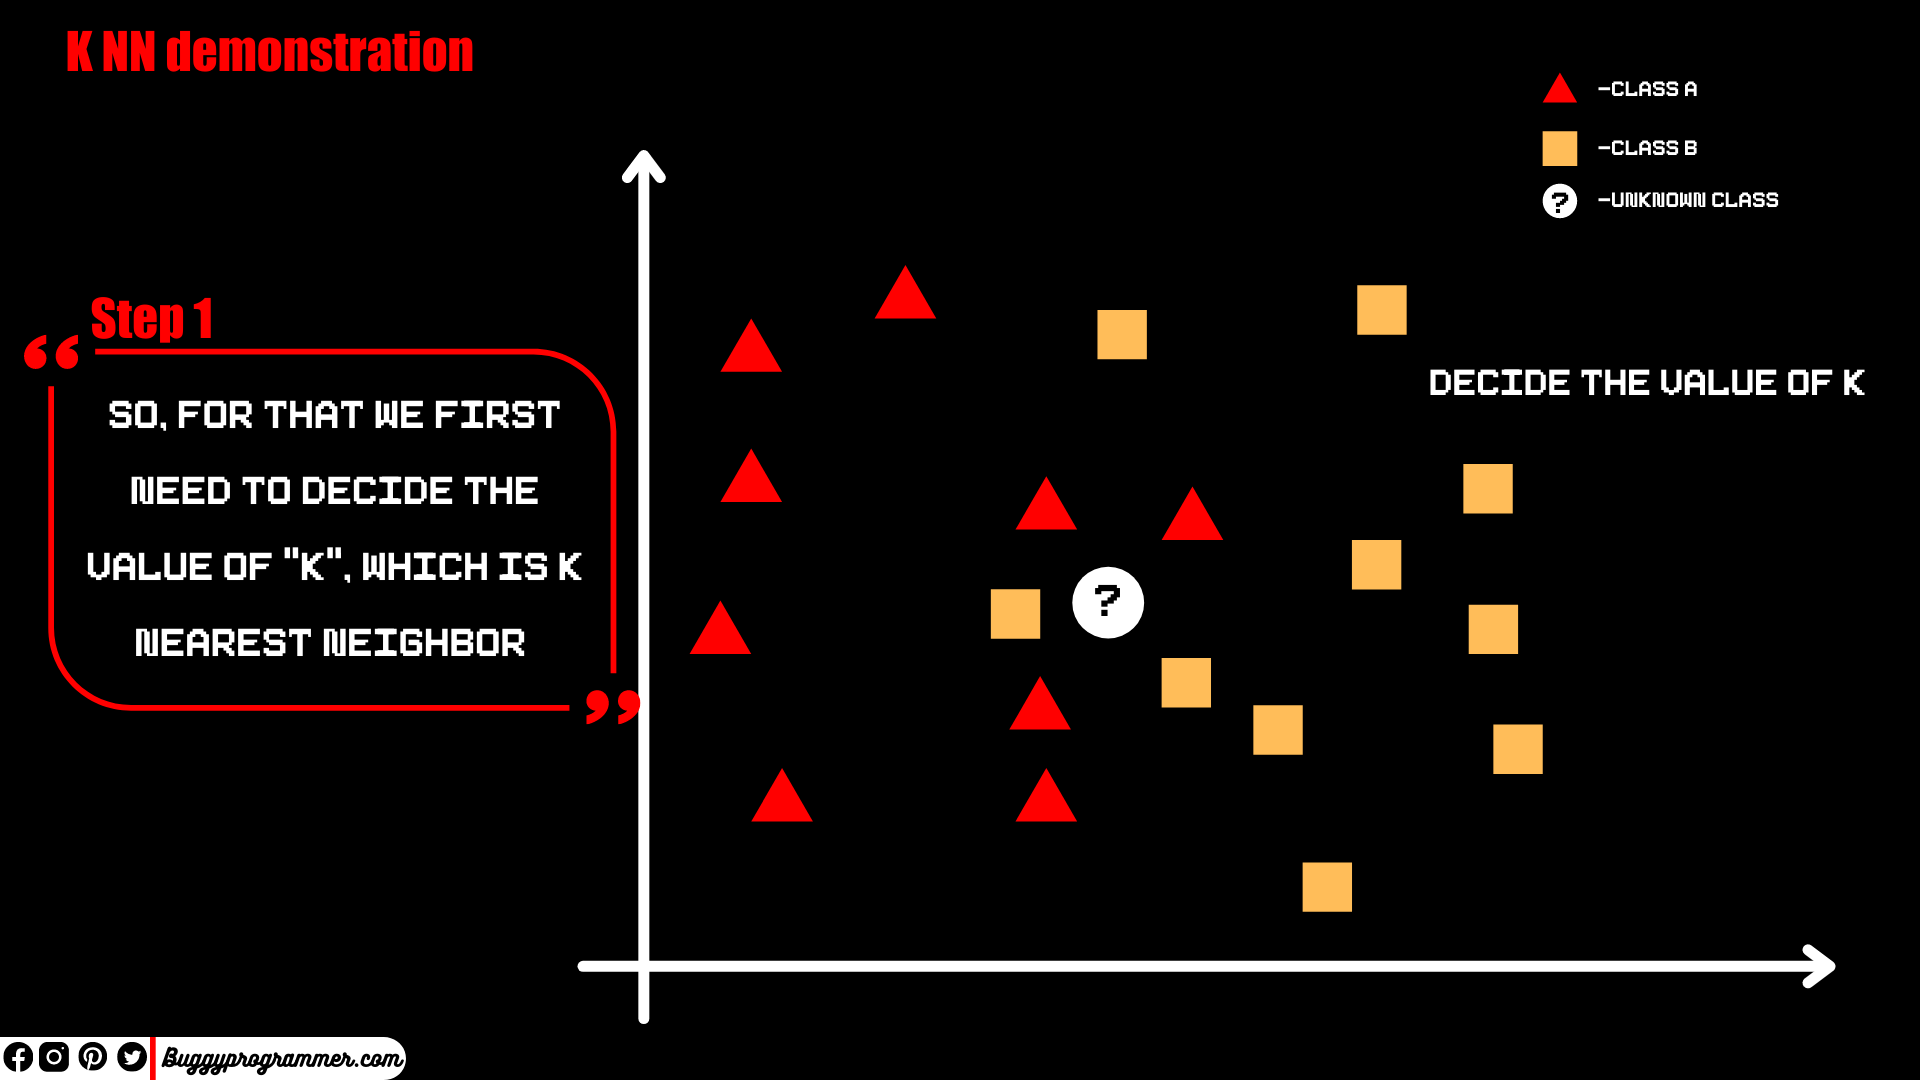
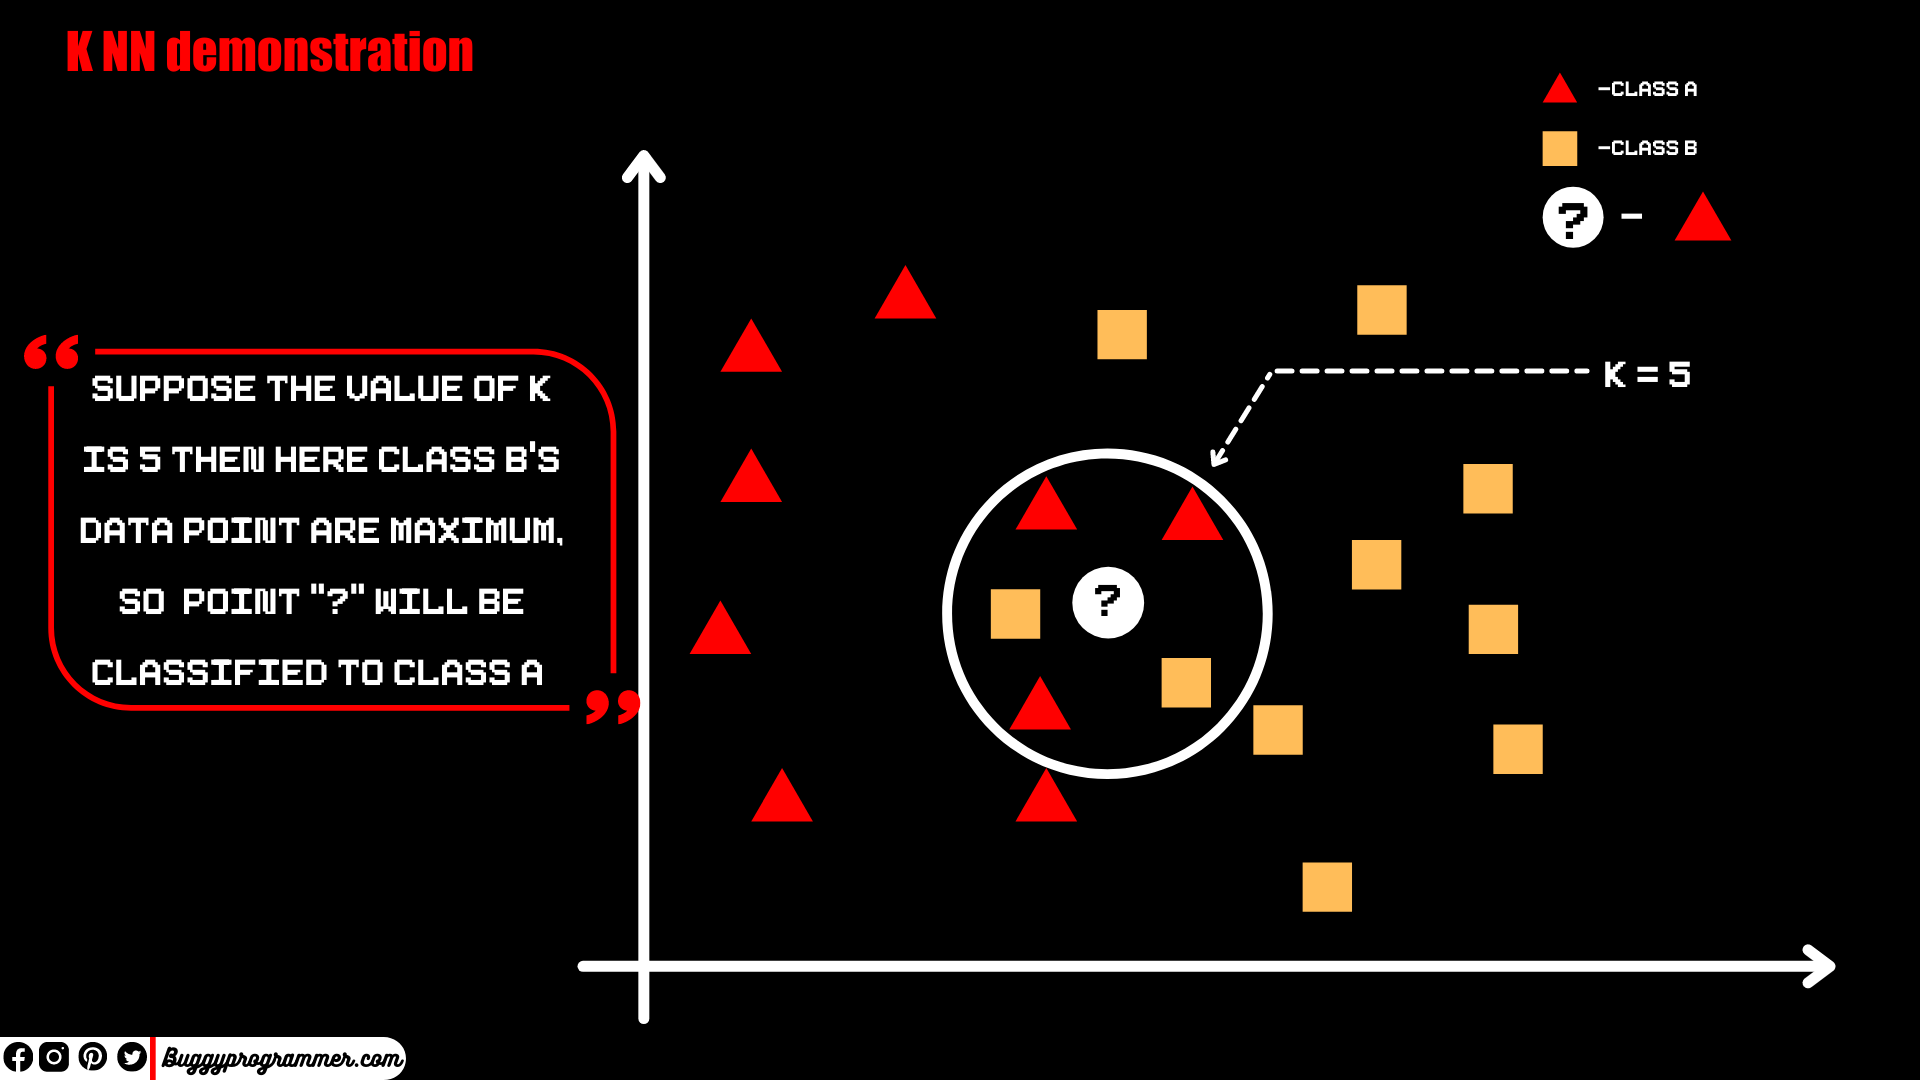
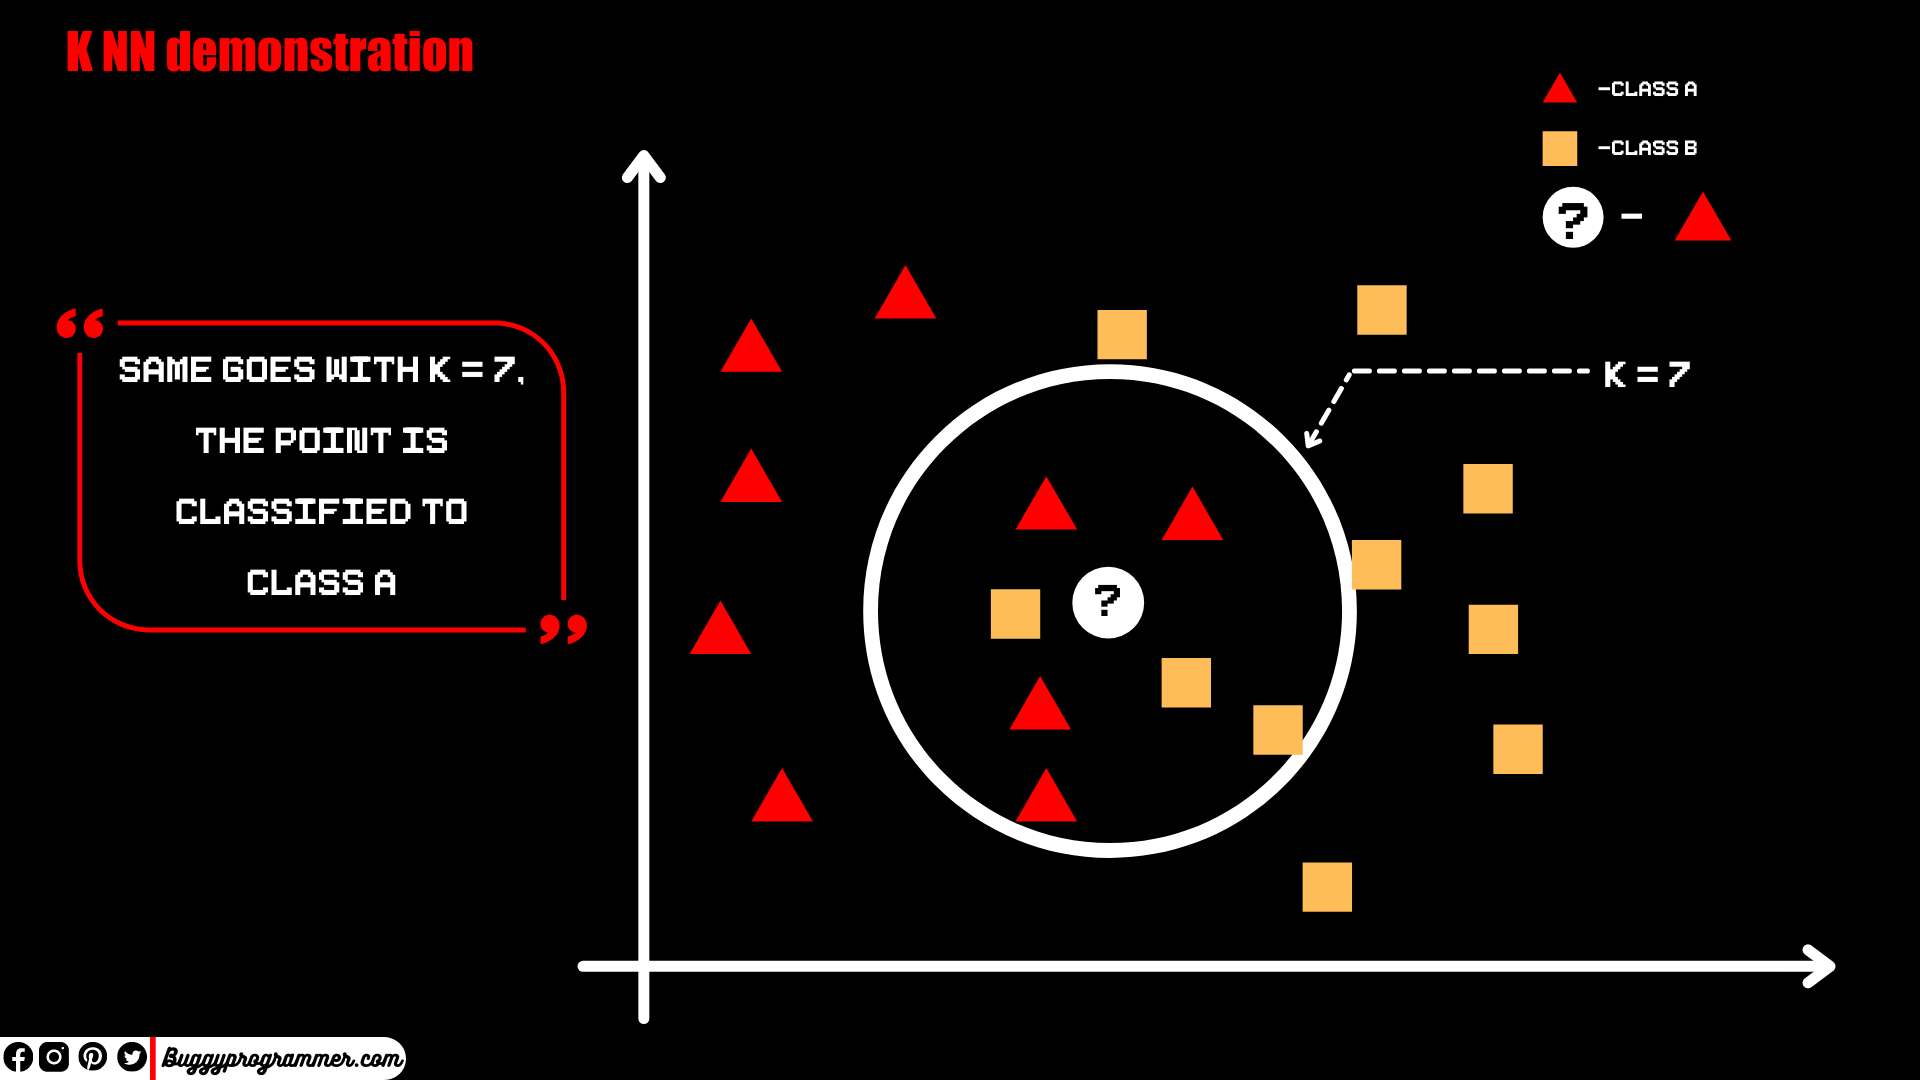
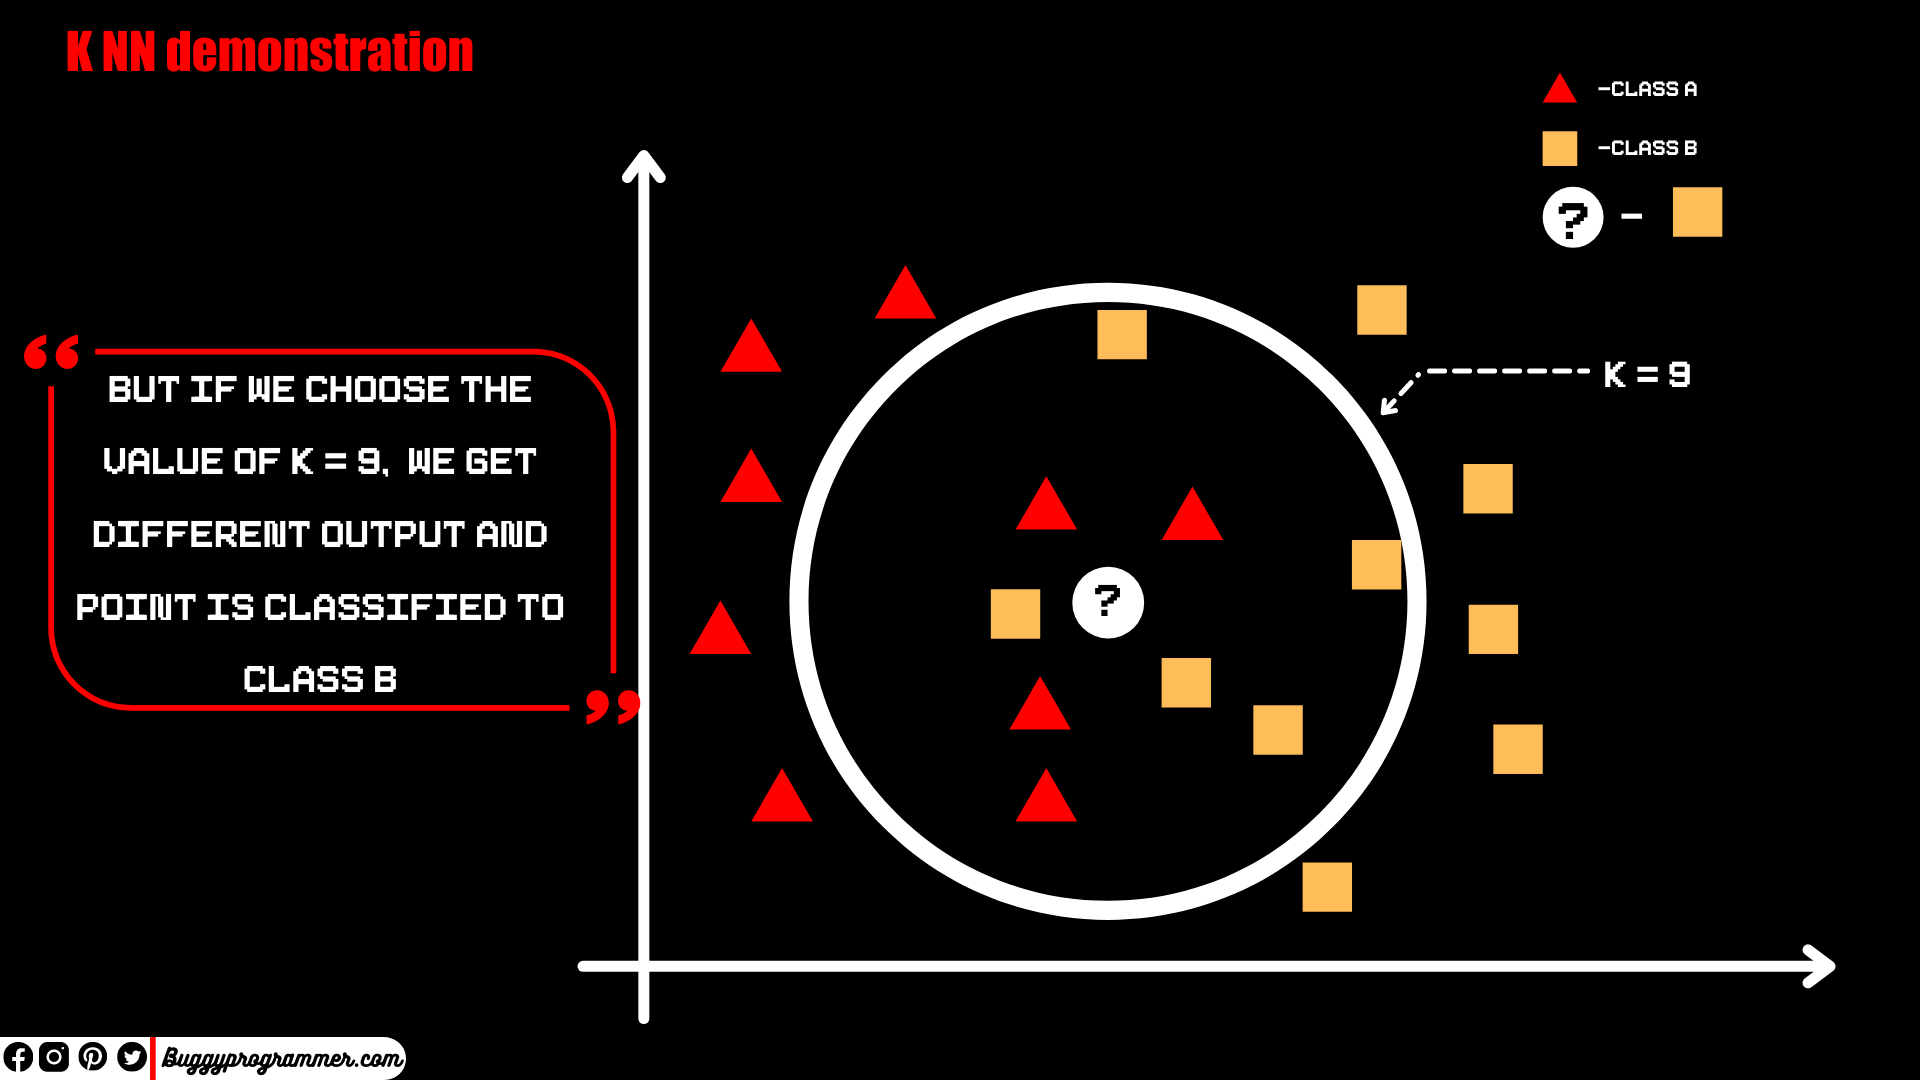

## Building K Nearest Neighbour Model

In [5]:
# importing requirements
import pandas as pd # <---- for handling tabular data
from sklearn.neighbors import KNeighborsClassifier # <--- for building linear regression model
from sklearn.model_selection import train_test_split # <----- for splitting data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # <-- for handling categorical label
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # <----- for calculating error

In [4]:
df = pd.read_csv('Iris.csv')
df.sample(5, random_state=32)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
22,23,4.6,3.6,1.0,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
134,135,6.1,2.6,5.6,1.4,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# we don't need Id column
df = df.drop(['Id'], axis=1)

In [16]:
# separating features and label
features = df.iloc[:, :-1]
label = df.iloc[:, -1]

In [17]:
# now we need to convert our label into numberical
newLabel = pd.get_dummies(label)

In [18]:
# splitting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(features, newLabel, test_size=0.2, random_state=21)

In [19]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [20]:
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# now let's create our model 
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
# let's predict our test sample
y_pred = model.predict(x_test)

In [40]:
# Test report 
print('Accuracy Score\n', accuracy_score(y_test, y_pred))
print('-'*20, '\nTraining Score\n', model.score(x_train, y_train), '\nTesting Score\n', model.score(x_test, y_test))
print('-'*20, '\nClassification Report\n', classification_report(y_test, y_pred))

Accuracy Score
 0.9666666666666667
-------------------- 
Training Score
 0.9833333333333333 
Testing Score
 0.9666666666666667
-------------------- 
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        12
           2       0.88      1.00      0.93         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
 samples avg       0.97      0.97      0.97        30



So we got preety good score :)